# Evaluating Distributions and generating experimental Crosstabs for the evaluation of Experiments

In [3]:
import numpy as np
import dask.array as da
import pandas as pd
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

import seaborn as sns

In [11]:
df = pd.read_csv('df_panel_fix.csv')

In [12]:
df_subset = df[["year", "reg", "province", "gdp", "fdi", 'it',"specific"]]
df_subset.columns = ["year", "region", "province", "gdp", "fdi", 'it',"specific"]

In [13]:
df=df_subset
df

,year,region,province,gdp,fdi,it,specific
0,1996,East China,Anhui,2093.30,50661,631930,147002.0
1,1997,East China,Anhui,2347.32,43443,657860,151981.0
2,1998,East China,Anhui,2542.96,27673,889463,174930.0
3,1999,East China,Anhui,2712.34,26131,1227364,285324.0
4,2000,East China,Anhui,2902.09,31847,1499110,195580.0
...,...,...,...,...,...,...,...
355,2003,East China,Zhejiang,9705.02,498055,2261631,391292.0
356,2004,East China,Zhejiang,11648.70,668128,3162299,656175.0
357,2005,East China,Zhejiang,13417.68,772000,2370200,656175.0
358,2006,East China,Zhejiang,15718.47,888935,2553268,1017303.0


## Distributions of Dependant Variables

### Right skew

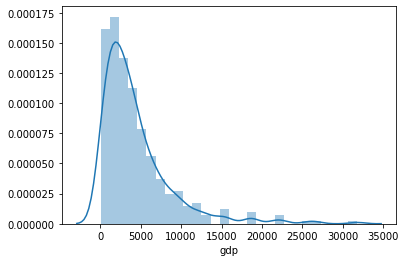

In [14]:
sns.distplot(df['gdp'])

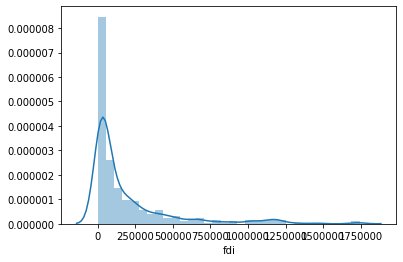

In [20]:
sns.distplot(df['fdi'])

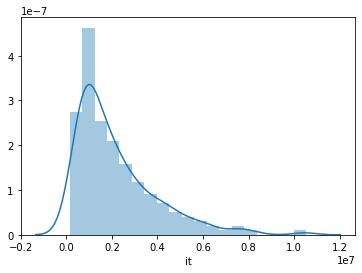

In [15]:
sns.distplot(df['it'])

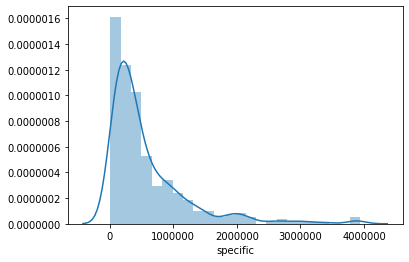

In [16]:
sns.distplot(df['specific'].dropna())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10439a19e8>]],
      dtype=object)

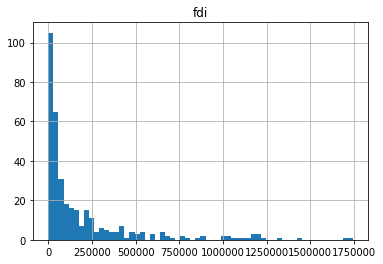

In [17]:
df.hist(column=['fdi'], bins=60)

## Removal of GDP value outliers more than 3 standard deviations away from the mean

## outlier removal of rows with GDP values that are > 3 standard deviations away form the mean

In [23]:
import scipy.stats as stats

In [25]:
df['gdp_zscore'] = stats.zscore(df['gdp'])

## these are the observations more then > 3 SDs away from the mean of gdp that will be dropped

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f104364e0f0>]],
      dtype=object)

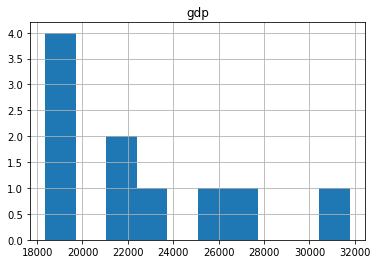

In [26]:
df[abs(df['gdp_zscore'])>3].hist(column = ['gdp'])

In [27]:
df_no_gdp_outliers=df[abs(df['gdp_zscore'])<3]

In [28]:
df_no_gdp_outliers

,year,region,province,gdp,fdi,it,specific,gdp_zscore
0,1996,East China,Anhui,2093.30,50661,631930,147002.0,-0.521466
1,1997,East China,Anhui,2347.32,43443,657860,151981.0,-0.464746
2,1998,East China,Anhui,2542.96,27673,889463,174930.0,-0.421061
3,1999,East China,Anhui,2712.34,26131,1227364,285324.0,-0.383239
4,2000,East China,Anhui,2902.09,31847,1499110,195580.0,-0.340870
...,...,...,...,...,...,...,...,...
354,2002,East China,Zhejiang,8003.67,307610,1962633,365437.0,0.798274
355,2003,East China,Zhejiang,9705.02,498055,2261631,391292.0,1.178172
356,2004,East China,Zhejiang,11648.70,668128,3162299,656175.0,1.612181
357,2005,East China,Zhejiang,13417.68,772000,2370200,656175.0,2.007180


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10429f5ba8>]],
      dtype=object)

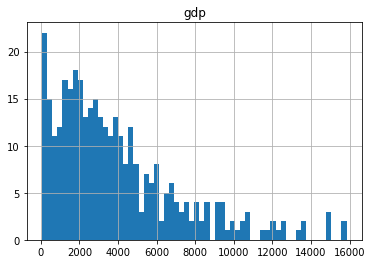

In [29]:
df_no_gdp_outliers.hist(column=['gdp'], bins=60)

In [31]:
counts_fiscal=df.groupby('region').count()
counts_fiscal

,year,province,gdp,fdi,it,specific,gdp_zscore
region,,,,,,,
East China,84,84,84,84,84,84,84
North China,48,48,48,48,48,47,48
Northeast China,36,36,36,36,36,36,36
Northwest China,60,60,60,60,60,60,60
South Central China,72,72,72,72,72,72,72
Southwest China,60,60,60,60,60,57,60


In [32]:
counts_fiscal=df.groupby('province').count()
counts_fiscal

,year,region,gdp,fdi,it,specific,gdp_zscore
province,,,,,,,
Anhui,12,12,12,12,12,12,12
Beijing,12,12,12,12,12,12,12
Chongqing,12,12,12,12,12,9,12
Fujian,12,12,12,12,12,12,12
Gansu,12,12,12,12,12,12,12
Guangdong,12,12,12,12,12,12,12
Guangxi,12,12,12,12,12,12,12
Guizhou,12,12,12,12,12,12,12
Hainan,12,12,12,12,12,12,12


## Subset by needed columns

In [33]:
df_no_gdp_outliers.columns

Index(['year', 'region', 'province', 'gdp', 'fdi', 'it', 'specific',
       'gdp_zscore'],
      dtype='object')

In [34]:
df_no_gdp_outliers_subset = df_no_gdp_outliers[['region', 'gdp', 'fdi', 'it']]
df_no_gdp_outliers_subset

,region,gdp,fdi,it
0,East China,2093.30,50661,631930
1,East China,2347.32,43443,657860
2,East China,2542.96,27673,889463
3,East China,2712.34,26131,1227364
4,East China,2902.09,31847,1499110
...,...,...,...,...
354,East China,8003.67,307610,1962633
355,East China,9705.02,498055,2261631
356,East China,11648.70,668128,3162299
357,East China,13417.68,772000,2370200


## Genearate an experimental_crosstab to be used in statistical tests

In [40]:
experimental_crosstab = df_no_gdp_outliers_subset.groupby('region').agg(['size', 'mean', 'std'])

In [57]:
experimental_crosstab.index

Index(['East China', 'North China', 'Northeast China', 'Northwest China',
       'South Central China', 'Southwest China'],
      dtype='object', name='region')

In [64]:
experimental_crosstab = experimental_crosstab.reset_index()

In [66]:
experimental_crosstab

region  gdp                            fdi                 \
                       size         mean          std size           mean   
0           East China   78  6070.604231  3500.372702   78  355577.897436   
1          North China   48  4239.038542  2866.705149   48  169600.583333   
2      Northeast China   36  3849.076944  1948.531835   36  136623.750000   
3      Northwest China   60  1340.026167  1174.399739   60   15111.133333   
4  South Central China   68  4835.540882  3697.129915   68  218931.426471   
5      Southwest China   60  2410.398833  2144.589994   60   25405.083333   

                   it                              
             std size          mean           std  
0  275635.866746   78  1.775615e+06  1.153030e+06  
1  127011.475909   48  1.733719e+06  1.548794e+06  
2  142734.495232   36  2.665148e+06  1.768442e+06  
3   22954.193559   60  1.703538e+06  1.446408e+06  
4  339981.399823   68  2.500962e+06  2.196436e+06  
5   31171.373876   60  2.424971e+06  2.002198e+06

In [75]:
experimental_crosstab.to_csv('fiscal_experimental_crosstab.csv')

In [65]:
experimental_crosstab.index[1]

1

In [60]:
experimental_crosstab.index[0]

'East China'

In [46]:
treatment=experimental_crosstab.index[0]
control=experimental_crosstab.index[1]

In [51]:
#control = 'Southwest China'
#treatment = 'East China'

test_cells = 'region'

In [49]:
test_cells = df.region

In [70]:
test_cells = 'region'

In [71]:
experimental_crosstab[experimental_crosstab[test_cells]==control]

region  gdp                            fdi                 \
               size         mean          std size           mean   
1  North China   48  4239.038542  2866.705149   48  169600.583333   

                   it                              
             std size          mean           std  
1  127011.475909   48  1.733719e+06  1.548794e+06

In [72]:
experimental_crosstab[experimental_crosstab[test_cells]==treatment]

region  gdp                            fdi                 \
              size         mean          std size           mean   
0  East China   78  6070.604231  3500.372702   78  355577.897436   

                   it                              
             std size          mean           std  
0  275635.866746   78  1.775615e+06  1.153030e+06

In [74]:
experimental_crosstab[experimental_crosstab[test_cells]==treatment]

region  gdp                            fdi                 \
              size         mean          std size           mean   
0  East China   78  6070.604231  3500.372702   78  355577.897436   

                   it                              
             std size          mean           std  
0  275635.866746   78  1.775615e+06  1.153030e+06

In [193]:

counts_control = 1000
counts_treatment = 2000
mean_control = 50
mean_treatment = 100
standard_deviation_treatment=.5
standard_deviation_control=.5





In [ ]:


df_no_gdp_outliers_subset2 = df_no_gdp_outliers.drop(['year', 'zscore', 'gdp_zscore', 'specific'], axis=1)
df_no_gdp_outliers_subset2

df_no_gdp_outliers_subset2.groupby('region').agg(['size', 'mean', 'std'])

In [99]:
experimental_table = df_no_gdp_outliers_subset

In [100]:
features = df.region
features

0      East China
1      East China
2      East China
3      East China
4      East China
          ...    
355    East China
356    East China
357    East China
358    East China
359    East China
Name: region, Length: 360, dtype: object

In [101]:
treatment = 'East China'
metric = 'gdp'

In [155]:
# mean_treatment = experimental_table[experimental_table[features]==treatment][metric].values[0]

In [103]:
experimental_table

,region,gdp,fdi,it
0,East China,2093.30,50661,631930
1,East China,2347.32,43443,657860
2,East China,2542.96,27673,889463
3,East China,2712.34,26131,1227364
4,East China,2902.09,31847,1499110
...,...,...,...,...
354,East China,8003.67,307610,1962633
355,East China,9705.02,498055,2261631
356,East China,11648.70,668128,3162299
357,East China,13417.68,772000,2370200


In [106]:
experimental_table.groupby('region').agg(['size', 'mean', 'std'])

gdp                            fdi                 \
                    size         mean          std size           mean   
region                                                                   
East China            78  6070.604231  3500.372702   78  355577.897436   
North China           48  4239.038542  2866.705149   48  169600.583333   
Northeast China       36  3849.076944  1948.531835   36  136623.750000   
Northwest China       60  1340.026167  1174.399739   60   15111.133333   
South Central China   68  4835.540882  3697.129915   68  218931.426471   
Southwest China       60  2410.398833  2144.589994   60   25405.083333   

                                     it                              
                               std size          mean           std  
region                                                               
East China           275635.866746   78  1.775615e+06  1.153030e+06  
North China          127011.475909   48  1.733719e+06  1.548794e+06  
Northeast China      142734.495232   36  2.665148e+06  1.768442e+06  
Northwest China       22954.193559   60  1.703538e+06  1.446408e+06  
South Central China  339981.399823   68  2.500962e+06  2.196436e+06  
Southwest China       31171.373876   60  2.424971e+06  2.002198e+06

In [108]:
control = 'Southwest China'
treatment = 'East China'

test_cells = 'region'

In [114]:
experimental_table[experimental_table[test_cells]==treatment]

,region,gdp,fdi,it
0,East China,2093.30,50661,631930
1,East China,2347.32,43443,657860
2,East China,2542.96,27673,889463
3,East China,2712.34,26131,1227364
4,East China,2902.09,31847,1499110
...,...,...,...,...
354,East China,8003.67,307610,1962633
355,East China,9705.02,498055,2261631
356,East China,11648.70,668128,3162299
357,East China,13417.68,772000,2370200


,region,gdp,fdi,it
24,Southwest China,1315.12,21878,176802
25,Southwest China,1509.75,38675,383402
26,Southwest China,1602.38,43107,535036
27,Southwest China,1663.20,23893,733232
28,Southwest China,1791.00,24436,1022148
29,Southwest China,1976.86,25649,1391668
30,Southwest China,2232.86,19576,1906968
31,Southwest China,2555.72,26083,1778125
32,Southwest China,3034.58,40508,2197948
33,Southwest China,3467.72,51600,2460625


In [148]:
column = 'gdp'
grouped_table = experimental_table.groupby(groupby_feature, as_index=False, sort=False)[column].agg(['size', 'mean', 'std'])
grouped_table

,size,mean,std
region,,,
East China,78,6070.604231,3500.372702
North China,48,4239.038542,2866.705149
Southwest China,60,2410.398833,2144.589994
Northwest China,60,1340.026167,1174.399739
South Central China,68,4835.540882,3697.129915
Northeast China,36,3849.076944,1948.531835


In [149]:
grouped_table.index

Index(['East China', 'North China', 'Southwest China', 'Northwest China',
       'South Central China', 'Northeast China'],
      dtype='object', name='region')

In [150]:
# grouped_table['groupby_feature']=grouped_table.index
# grouped_table['groupby_feature']

In [151]:
grouped_table.columns

Index(['size', 'mean', 'std'], dtype='object')

In [152]:
grouped_table

,size,mean,std
region,,,
East China,78,6070.604231,3500.372702
North China,48,4239.038542,2866.705149
Southwest China,60,2410.398833,2144.589994
Northwest China,60,1340.026167,1174.399739
South Central China,68,4835.540882,3697.129915
Northeast China,36,3849.076944,1948.531835


In [154]:
grouped_table.columns = ['count', 'mean', 'stddev_mean']
grouped_table

,count,mean,stddev_mean
region,,,
East China,78,6070.604231,3500.372702
North China,48,4239.038542,2866.705149
Southwest China,60,2410.398833,2144.589994
Northwest China,60,1340.026167,1174.399739
South Central China,68,4835.540882,3697.129915
Northeast China,36,3849.076944,1948.531835


In [ ]:
control, treatment, counts_control, counts_treatment, p_value, delta = ttest_ind_from_stats(grouped_table, 'mean', grouped_table.index[0], grouped_table.index[1], column, test_cell=groupby_feature)

In [ ]:
t_statistic, p_value = ttest_ind_from_stats(mean1=mean_treatment, std1=standard_deviation_treatment, nobs1=counts_treatment,mean2=mean_control,std2=standard_deviation_control,nobs2=counts_control)


In [ ]:
counts_control = 1000
counts_treatment = 2000

mean_control = 50
mean_treatment = 100

standard_deviation_treatment=.5
standard_deviation_control=.5





0      East China
1      East China
2      East China
3      East China
4      East China
          ...    
355    East China
356    East China
357    East China
358    East China
359    East China
Name: region, Length: 360, dtype: object

In [104]:
counts_control = experimental_table

In [92]:
[features]==treatment

False

In [ ]:
][metric].values[0]

In [77]:
from statsmodels.stats.power import NormalIndPower, TTestIndPower
from scipy.stats import ttest_ind_from_stats
import numpy as np




standard_deviation_treatment=.5
standard_deviation_control=.5
counts_control = 1000
counts_treatment = 2000
mean_control = 50
mean_treatment = 100



t_statistic, p_value = ttest_ind_from_stats(mean1=mean_treatment, std1=standard_deviation_treatment, nobs1=counts_treatment,mean2=mean_control,std2=standard_deviation_control,nobs2=counts_control)

t_statistic

p_value


print(t_statistic)





2581.9888974716114


In [ ]:
return t_statistic
def ttest(table


In [ ]:
t_statistic, p_value = ttest_ind_from_stats(mean1=mean_treatment, std1=standard_deviation_treatment, nobs1=counts_treatment,mean2=mean_control,std2=standard_deviation_control,nobs2=counts_control)

In [75]:
EastvNorth=pd.DataFrame()
EastvNorth= ttest

In [ ]:
# at what level - iid assupmtions

all obs are iid - 90 v. 30 not iid
what level member - drug
or member level iid assumption



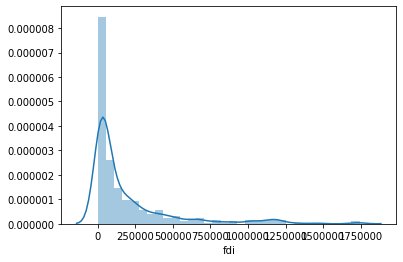

In [29]:
sns.distplot(df['fdi'])

In [7]:
table = df

In [10]:
groups = df.region

In [ ]:
counts_column=

In [17]:
groupby_feature =  df.region

In [18]:
group_table = table.groupby(groupby_feature, as_index=False)[col].agg(['size', 'mean', 'std'])

NameError: name 'col' is not defined

In [13]:
hive_results_table = pd.DataFrame()

In [14]:
hive_results_table = ttest()

""


In [ ]:
#distributions of data normal or not checking assumptions of ttests, avnovas etc.

ttest start then do all

In [8]:
counts_control = table[table[groups==control][counts_column]].values[0]

NameError: name 'groups' is not defined

In [3]:
from statsmodels.stats.power import NormalIndPower, TTestIndPower
from scipy.stats import ttest_ind_from_stats
import numpy as np

In [7]:
standard_deviation_treatment=.5

standard_deviation_control=.5

counts_control = 1000

counts_treatment = 2000


mean_control = 50

mean_treatment = 100



In [8]:
t_statistic, p_value = ttest_ind_from_stats(mean1=mean_treatment, std1=standard_deviation_treatment, nobs1=counts_treatment,mean2=mean_control,std2=standard_deviation_control,nobs2=counts_control)

In [9]:
t_statistic

2581.9888974716114

In [10]:
p_value

0.0

In [11]:
return t_statistic

SyntaxError: 'return' outside function (<ipython-input-11-c7b465a5d291>, line 1)

In [12]:
print(t_statistic)

2581.9888974716114


In [ ]:
def ttest(table,)